In [1]:
# 1.  Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# 2.  Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


In [3]:
# 3.  First look at its main features (head, shape, info).
display(customer_df.shape)
customer_df.head()
customer_df.info()

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# 4.  Rename the columns so they follow the PE8 (snake case).
customer_df.columns= customer_df.columns.str.lower()
customer_df

customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# 5.  Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')


In [7]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
# 6.  Check NaN values per column.
customer_df.isnull().sum(axis = 0)


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
# 7.  Define a function that differentiates between continuous and discrete variables. 
# Hint: A number of unique values might be useful. 
# Store continuous data into a continuous variable and do the same for discrete and categorical.

customer_df.nunique()
#superstore['Country'].unique()
#superstore['Country'].value_counts()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [10]:
numerical = customer_df._get_numeric_data()
numerical.T

,0,1,2,3,4,5,6,7,8,9,...,9124,9125,9126,9127,9128,9129,9130,9131,9132,9133
customer_lifetime_value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575,8256.297800,5380.898636,7216.100311,24127.50402,7388.178085,...,16261.5855,19872.262000,4628.995325,5032.165498,4100.398533,23405.987980,3096.511217,8163.890428,7524.442436,2611.836866
income,56274.000000,0.000000,48767.000000,0.000000,43836.000000,62902.000000,55350.000000,0.000000,14072.00000,28812.000000,...,60646.0000,0.000000,0.000000,66367.000000,47761.000000,71941.000000,21604.000000,0.000000,21941.000000,0.000000
monthly_premium_auto,69.000000,94.000000,108.000000,106.000000,73.000000,69.000000,67.000000,101.000000,71.00000,93.000000,...,134.0000,185.000000,67.000000,64.000000,104.000000,73.000000,79.000000,85.000000,96.000000,77.000000
months_since_last_claim,32.000000,13.000000,18.000000,18.000000,12.000000,14.000000,0.000000,0.000000,13.00000,17.000000,...,31.0000,26.000000,25.000000,6.000000,16.000000,18.000000,14.000000,9.000000,34.000000,3.000000
months_since_policy_inception,5.000000,42.000000,38.000000,65.000000,44.000000,94.000000,13.000000,68.000000,3.00000,7.000000,...,42.0000,35.000000,21.000000,48.000000,58.000000,89.000000,28.000000,37.000000,3.000000,90.000000
number_of_open_complaints,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
number_of_policies,1.000000,8.000000,2.000000,7.000000,1.000000,2.000000,9.000000,4.000000,2.00000,8.000000,...,2.0000,2.000000,4.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000
total_claim_amount,384.811147,1131.464935,566.472247,529.881344,138.130879,159.383042,321.600000,363.029680,511.20000,425.527834,...,643.2000,1950.725547,482.400000,307.200000,541.282007,198.234764,379.200000,790.784983,691.200000,369.600000


In [11]:
discrete = []
for x in numerical.columns: 
    if numerical[x].nunique() < 10: 
        discrete.append(x) 
print (discrete)

continuous = []
for x in numerical.columns: 
    if numerical[x].nunique() >= 10: 
        continuous.append(x) 
print (continuous)

['number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']


In [12]:
categorical = customer_df.select_dtypes('object')
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [13]:
# 8.  For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
# Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.


In [14]:
categorical.head().T

,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
location_code,Suburban,Suburban,Suburban,Suburban,Rural
marital_status,Married,Single,Married,Married,Single
policy_type,Corporate Auto,Personal Auto,Personal Auto,Corporate Auto,Personal Auto


In [15]:
# display(categorical['customer'].value_counts(dropna=False))

# Display value_counts for multiple columns:

for i in categorical.columns:
    x = categorical[i].value_counts(dropna=False)
    display(i,x)

'customer'

PX99904    1
XI36396    1
MI99404    1
SB27146    1
WC83942    1
          ..
JG68387    1
UQ24268    1
WF91295    1
TI61458    1
AI16519    1
Name: customer, Length: 9134, dtype: int64

'state'

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

'response'

No     7826
Yes    1308
Name: response, dtype: int64

'coverage'

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

'education'

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

'employmentstatus'

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

'gender'

F    4658
M    4476
Name: gender, dtype: int64

'location_code'

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

'marital_status'

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

'policy_type'

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

'policy'

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

'renew_offer_type'

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

'sales_channel'

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

'vehicle_class'

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

'vehicle_size'

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

**No clean-up actions noted so far.

In [16]:
# 9.  Get categorical features.

categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


*10.  What should we do with the customer_id column?

I would drop this column as it does not appear to contain information that will be useful for our purposes.  
It also represents a unique value per customer.

# BEGINNING OF Lab | Cleaning categorical data 

In [17]:
# 1.  Import the necessary libraries if you are starting a new notebook.

import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure
%matplotlib inline

*2.  Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [18]:
discrete_df = customer_df[customer_df.columns[customer_df.columns.isin(discrete)]]
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [19]:
continuous_df = customer_df[customer_df.columns[customer_df.columns.isin(continuous)]]
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


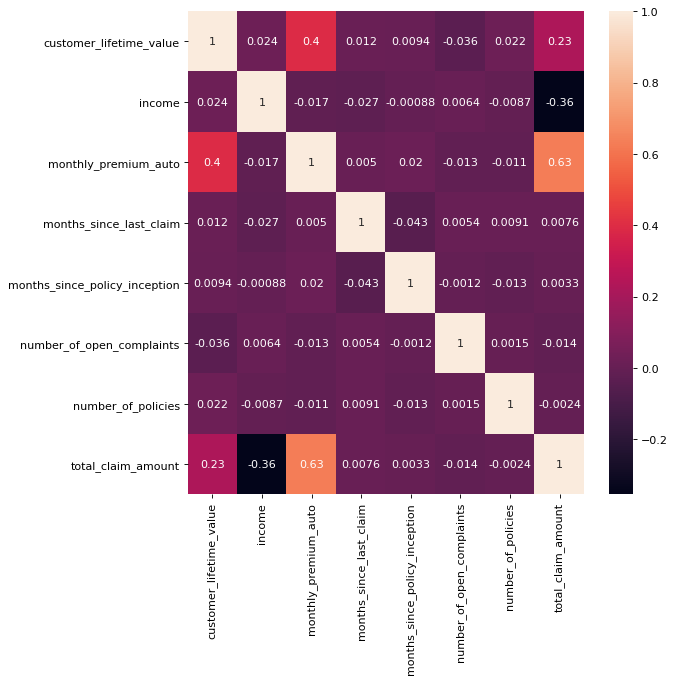

In [20]:
# 3.  Plot a correlation matrix, what can you see?

figure(figsize=(8, 8), dpi=80)
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

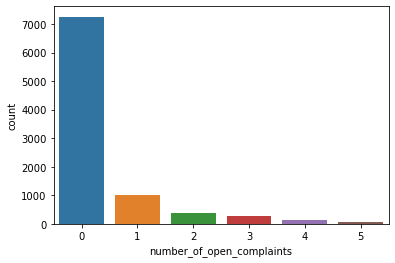

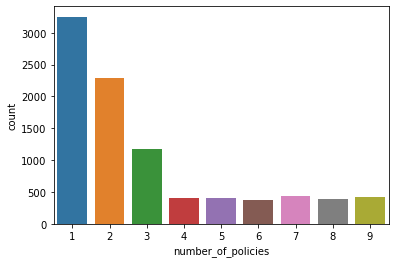

In [21]:
# 4.  Create a function to plot every discrete variables. Do the same with continuous variables 
# (be careful, you may change the plot type to another one better suited for continuous data).

def plot_disc(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.show()
    return None

plot_disc(discrete_df)

In [ ]:
# 5.  What can you see in the plots?


In [ ]:
# 6.  Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


In [ ]:
# 7.  Have you found outliers? If you have, what should we do with them?


Points 8 to 12 are covered in points 6 to 10 of the first part of this workbook.

8.  Check nan values per column.
9.  Define a function that differentiate between continuous and discrete variables. 
Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
10.  for the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
11.  Get categorical features.
12.  What should we do with the customer id column?